# AI COURSE - FIRST ASSIGNMENT
## MUTLICLASS CLASSIFICATION PROBLEM WITH IMAGES 
We re-do the steps from the previous notebook for augmented images and re-train the models

### == IMPORTS ==========================================


**general imports**

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import os 
import shutil 
import random 
import pathlib

import numpy as np
import matplotlib.pyplot as plt 
import cv2 
import PIL

**tensorflow imports**

In [133]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, losses, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, \
    Activation, Flatten, Dense, Lambda, MaxPooling2D, Dropout

### == CHECKING THE DATA ================================


**making the path**

In [134]:
data_dir = '/content/drive/MyDrive/Projects/AI-course/1st Assignment/data'
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data')

**listing the images**

In [95]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (1).jpg'),
 PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (2).jpg'),
 PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (3).jpg'),
 PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (4).jpg'),
 PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (5).jpg')]

**how many images do we have**

In [96]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

180


**loading the image paths**

In [97]:
bikes = list(data_dir.glob('bike/*'))
buses = list(data_dir.glob('bus/*')) 
cars  = list(data_dir.glob('car/*'))
print(bikes[5])
print(buses[5])
print(cars[5])

/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (6).jpg
/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bus/bus (6).jpg
/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/car/car (6).jpg


**looking at samples**

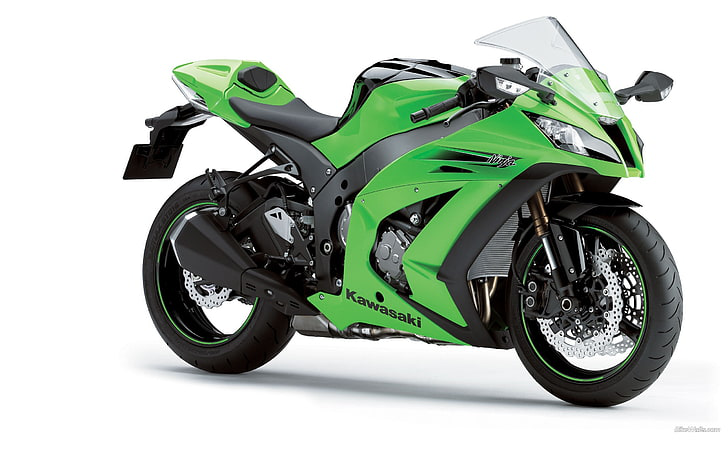

In [98]:
PIL.Image.open(str(bikes[1]))

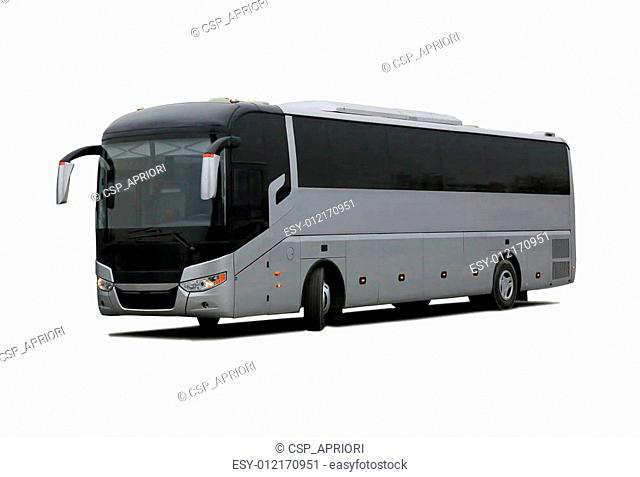

In [99]:
PIL.Image.open(str(buses[8]))

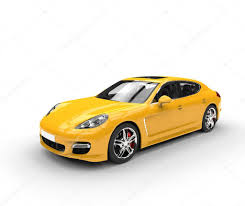

In [100]:
PIL.Image.open(str(cars[1]))

### == LOADING THE DATA ================================


**constructing image path dictionary**

In [136]:
vehicles_images_dict = {
    'bikes': list(data_dir.glob('bike/*')),
    'buses': list(data_dir.glob('bus/*')),
    'cars':  list(data_dir.glob('car/*')),
}

**constructing label dictionary**

In [102]:
vehicles_labels_dict = {
    'bikes': 0, 
    'buses': 1,
    'cars': 2,
}

**double checking the dictionary**

In [103]:
vehicles_images_dict['bikes'][:5]

[PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (1).jpg'),
 PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (2).jpg'),
 PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (3).jpg'),
 PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (4).jpg'),
 PosixPath('/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (5).jpg')]

In [104]:
str(vehicles_images_dict['bikes'][0])

'/content/drive/MyDrive/Projects/AI-course/1st Assignment/data/bike/bike (1).jpg'

**loading the images into numpy arrays**

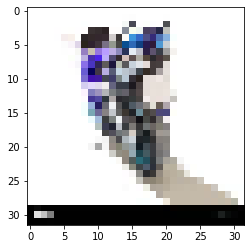

In [105]:
X, y = [], []

for vehicle_name, images in vehicles_images_dict.items():
    for image in images: 
        img = cv2.imread(str(image)) #, cv2.IMREAD_GRAYSCALE)

        # (thresh, im_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        # thresh = 127
        # im_bw = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]

        resized_img = cv2.resize(img, (32, 32))
        # resized_img = np.expand_dims(resized_img, axis=2)
        X.append(resized_img)
        y.append(vehicles_labels_dict[vehicle_name])


from matplotlib.pyplot import imshow
imshow(X[5])

X = np.array(X)
y = np.array(y)

In [106]:
X.shape

(180, 32, 32, 3)

### == SPLITTING DATA ====================================


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

### == LENET-5 MODEL ====================================
#### (WITHOUT IMAGE AUGMENTATION)


**initializing the model and adding the layers**

In [108]:
num_classes = 3

model = Sequential()

model.add(Conv2D(6, 5, activation='tanh', input_shape=X_train.shape[1:]))
model.add(AveragePooling2D(2))
model.add(Activation('sigmoid'))
model.add(Conv2D(16, 5, activation='tanh'))
model.add(AveragePooling2D(2))
model.add(Activation('sigmoid'))
model.add(Conv2D(120, 5, activation='tanh'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

# checking the model layers
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_16 (Activation)  (None, 14, 14, 6)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_17 (Activation)  (None, 5, 5, 16)        

**compiling the model**

In [109]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

**fitting the model**

In [110]:
history = model.fit(X_train, y_train, batch_size=64, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
3/3 [==============================] - 1s 88ms/step - loss: 1.4364 - accuracy: 0.3852 - val_loss: 1.3373 - val_accuracy: 0.3333
Epoch 2/300
3/3 [==============================] - 0s 14ms/step - loss: 1.3903 - accuracy: 0.3333 - val_loss: 1.3704 - val_accuracy: 0.3333
Epoch 3/300
3/3 [==============================] - 0s 23ms/step - loss: 1.2537 - accuracy: 0.3185 - val_loss: 1.1331 - val_accuracy: 0.2889
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 1.1413 - accuracy: 0.3259 - val_loss: 1.1502 - val_accuracy: 0.3778
Epoch 5/300
3/3 [==============================] - 0s 13ms/step - loss: 1.2060 - accuracy: 0.3185 - val_loss: 1.1236 - val_accuracy: 0.3333
Epoch 6/300
3/3 [==============================] - 0s 22ms/step - loss: 1.1608 - accuracy: 0.3333 - val_loss: 1.1358 - val_accuracy: 0.3333
Epoch 7/300
3/3 [==============================] - 0s 48ms/step - loss: 1.1135 - accuracy: 0.3407 - val_loss: 1.1603 - val_accuracy: 0.2889
Epoch 8/300
3/3 [===

**plotting the loss function and accuracy over epochs**

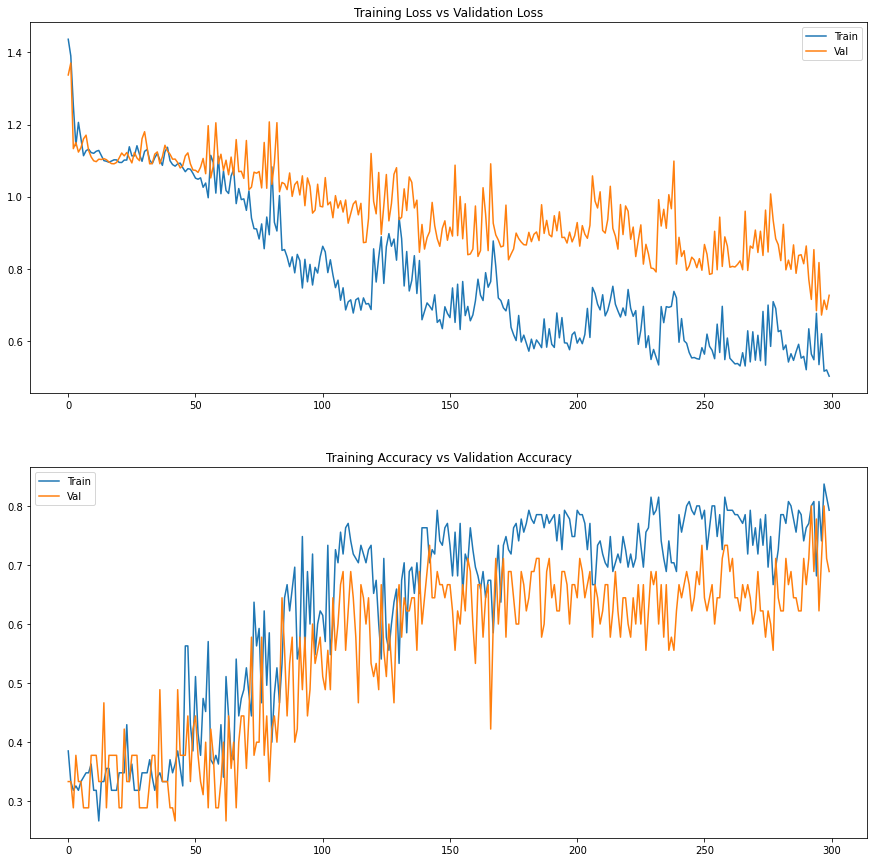

In [111]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

**evaluation of the model**

In [112]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.7267 - accuracy: 0.6889


[0.7266948223114014, 0.6888889074325562]

### == ALEXNET MODEL ===================================
#### (WITHOUT IMAGE AUGMENTATION)

**initializing the model and adding the layers**

In [113]:
model = models.Sequential()

# model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=X_train.shape[1:]))
model.add(Conv2D(96, 11, strides=4, padding='same'))
model.add(Lambda(tf.nn.local_response_normalization))
model.add(Activation('relu'))
model.add(MaxPooling2D(3, strides=2))
model.add(Conv2D(256, 5, strides=4, padding='same'))
model.add(Lambda(tf.nn.local_response_normalization))
model.add(Activation('relu'))
model.add(MaxPooling2D(3, strides=2))
model.add(Conv2D(384, 3, strides=4, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(384, 3, strides=4, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, 3, strides=4, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 lambda_4 (Lambda)           (None, 56, 56, 96)        0         
                                                                 
 activation_18 (Activation)  (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 256)         614656    
                                                     

**compiling the model**

In [114]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

**fitting the model**

In [115]:
history = model.fit(X_train, y_train, batch_size=64, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
3/3 [==============================] - 1s 332ms/step - loss: 1.1017 - accuracy: 0.3037 - val_loss: 1.0995 - val_accuracy: 0.2889
Epoch 2/300
3/3 [==============================] - 0s 92ms/step - loss: 1.1005 - accuracy: 0.2593 - val_loss: 1.1020 - val_accuracy: 0.3333
Epoch 3/300
3/3 [==============================] - 0s 92ms/step - loss: 1.1039 - accuracy: 0.3407 - val_loss: 1.1100 - val_accuracy: 0.2889
Epoch 4/300
3/3 [==============================] - 0s 93ms/step - loss: 1.1001 - accuracy: 0.3407 - val_loss: 1.1059 - val_accuracy: 0.3333
Epoch 5/300
3/3 [==============================] - 0s 93ms/step - loss: 1.0975 - accuracy: 0.4074 - val_loss: 1.1042 - val_accuracy: 0.3333
Epoch 6/300
3/3 [==============================] - 0s 92ms/step - loss: 1.0998 - accuracy: 0.3333 - val_loss: 1.1055 - val_accuracy: 0.3333
Epoch 7/300
3/3 [==============================] - 0s 93ms/step - loss: 1.1008 - accuracy: 0.3333 - val_loss: 1.1027 - val_accuracy: 0.3333
Epoch 8/300
3/3 [==

**plotting the loss function and accuracy over epochs**

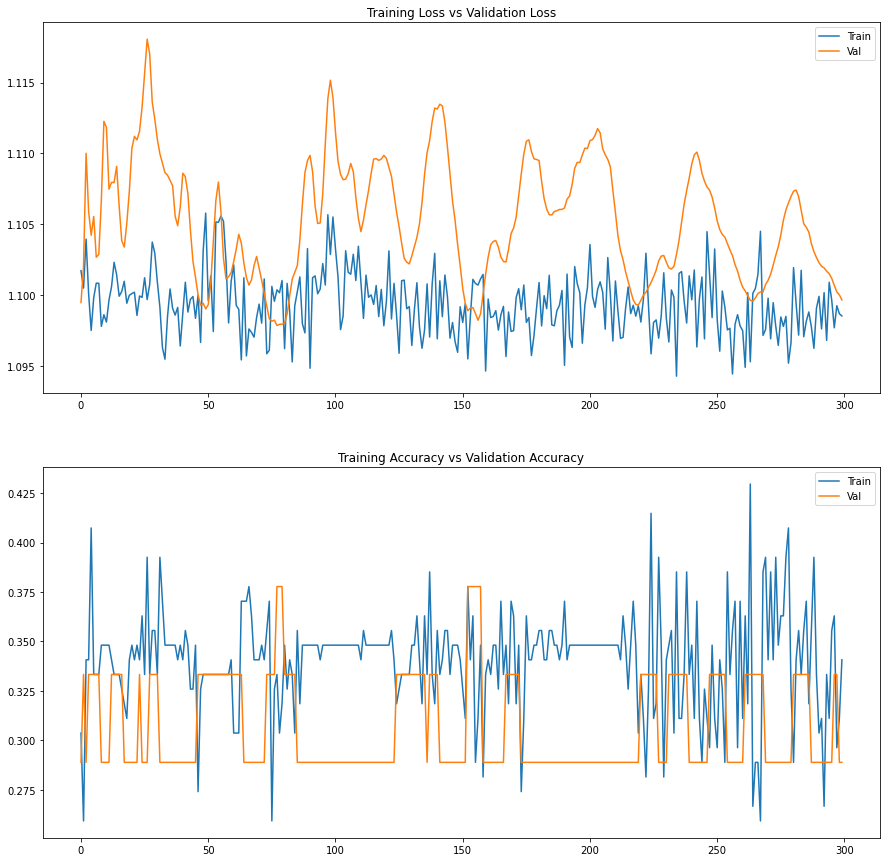

In [116]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [117]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 15ms/step - loss: 1.0997 - accuracy: 0.2889


[1.0996581315994263, 0.2888889014720917]

### == IMAGE AUGMENTATION ==============================



**defining a data augmentation function**

In [118]:
img_height = 32
img_width = 32

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.5),
  ]
)

**checking the difference of original image and augmented image**

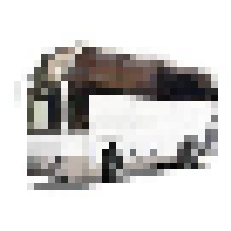

In [141]:
plt.axis('off')
plt.imshow(X[87])

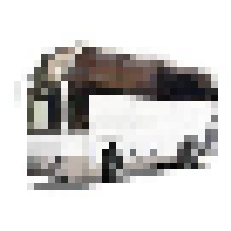

In [142]:
plt.axis('off')
plt.imshow(data_augmentation(X)[87].numpy().astype("uint8"))

### == LENET-5 MODEL ====================================
#### (USING IMAGE AUGMENTATION)


In [121]:
num_classes = 3

model = Sequential()

model.add(data_augmentation)
model.add(Conv2D(6, 5, activation='tanh', input_shape=X_train.shape[1:]))
model.add(AveragePooling2D(2))
model.add(Activation('sigmoid'))
model.add(Conv2D(16, 5, activation='tanh'))
model.add(AveragePooling2D(2))
model.add(Activation('sigmoid'))
model.add(Conv2D(120, 5, activation='tanh'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

# checking the model layers
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_15 (Sequential)  (None, 32, 32, 3)         0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_23 (Activation)  (None, 14, 14, 6)         0         
                                                                 
 conv2d_28 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                         

In [122]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [123]:
history = model.fit(X_train, y_train, batch_size=64, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
3/3 [==============================] - 1s 109ms/step - loss: 1.5068 - accuracy: 0.2963 - val_loss: 1.3738 - val_accuracy: 0.2889
Epoch 2/300
3/3 [==============================] - 0s 36ms/step - loss: 1.1871 - accuracy: 0.3704 - val_loss: 1.2912 - val_accuracy: 0.3778
Epoch 3/300
3/3 [==============================] - 0s 33ms/step - loss: 1.3881 - accuracy: 0.3185 - val_loss: 1.1018 - val_accuracy: 0.3333
Epoch 4/300
3/3 [==============================] - 0s 62ms/step - loss: 1.0952 - accuracy: 0.3481 - val_loss: 1.4347 - val_accuracy: 0.2889
Epoch 5/300
3/3 [==============================] - 0s 65ms/step - loss: 1.3605 - accuracy: 0.3481 - val_loss: 1.4267 - val_accuracy: 0.2889
Epoch 6/300
3/3 [==============================] - 0s 63ms/step - loss: 1.2856 - accuracy: 0.3481 - val_loss: 1.1827 - val_accuracy: 0.3333
Epoch 7/300
3/3 [==============================] - 0s 97ms/step - loss: 1.1406 - accuracy: 0.3333 - val_loss: 1.0937 - val_accuracy: 0.3778
Epoch 8/300
3/3 [==

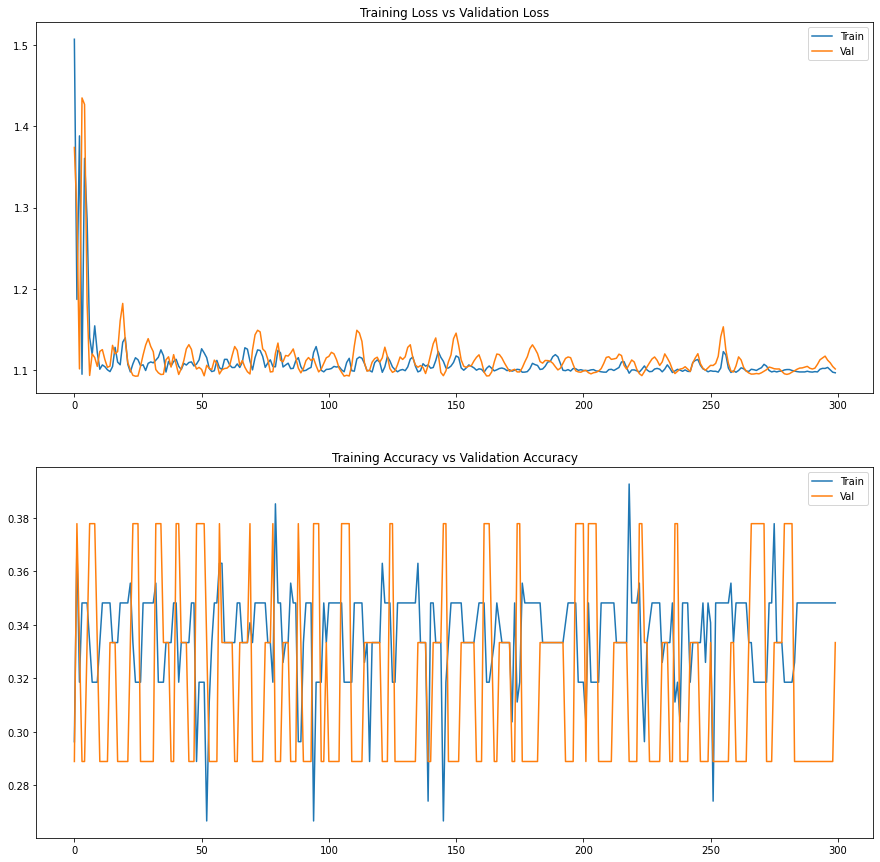

In [124]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [125]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.1017 - accuracy: 0.3333


[1.1016994714736938, 0.3333333432674408]

### == ALEXNET MODEL ====================================
#### (USING IMAGE AUGMENTATION)


**initializing the model and adding layers**

In [126]:
model = models.Sequential()

model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=X_train.shape[1:]))
model.add(Conv2D(96, 11, strides=4, padding='same'))
model.add(Lambda(tf.nn.local_response_normalization))
model.add(Activation('relu'))
model.add(MaxPooling2D(3, strides=2))
model.add(Conv2D(256, 5, strides=4, padding='same'))
model.add(Lambda(tf.nn.local_response_normalization))
model.add(Activation('relu'))
model.add(MaxPooling2D(3, strides=2))
model.add(Conv2D(384, 3, strides=4, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(384, 3, strides=4, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, 3, strides=4, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_15 (Sequential)  (None, 32, 32, 3)         0         
                                                                 
 resizing_3 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 lambda_6 (Lambda)           (None, 56, 56, 96)        0         
                                                                 
 activation_25 (Activation)  (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                     

**compiling the mode**

In [127]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

**fitting the model**

In [128]:
history = model.fit(X_train, y_train, batch_size=64, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
3/3 [==============================] - 2s 206ms/step - loss: 1.1017 - accuracy: 0.3852 - val_loss: 1.1011 - val_accuracy: 0.3333
Epoch 2/300
3/3 [==============================] - 0s 109ms/step - loss: 1.1036 - accuracy: 0.3333 - val_loss: 1.1019 - val_accuracy: 0.3333
Epoch 3/300
3/3 [==============================] - 0s 109ms/step - loss: 1.1014 - accuracy: 0.3333 - val_loss: 1.1074 - val_accuracy: 0.3333
Epoch 4/300
3/3 [==============================] - 0s 111ms/step - loss: 1.0982 - accuracy: 0.3333 - val_loss: 1.1109 - val_accuracy: 0.2889
Epoch 5/300
3/3 [==============================] - 0s 113ms/step - loss: 1.0969 - accuracy: 0.3481 - val_loss: 1.1180 - val_accuracy: 0.2889
Epoch 6/300
3/3 [==============================] - 0s 111ms/step - loss: 1.1009 - accuracy: 0.3481 - val_loss: 1.1296 - val_accuracy: 0.2889
Epoch 7/300
3/3 [==============================] - 0s 109ms/step - loss: 1.1095 - accuracy: 0.3481 - val_loss: 1.1243 - val_accuracy: 0.2889
Epoch 8/300
3

**plotting the accuracy and loss against epochs**

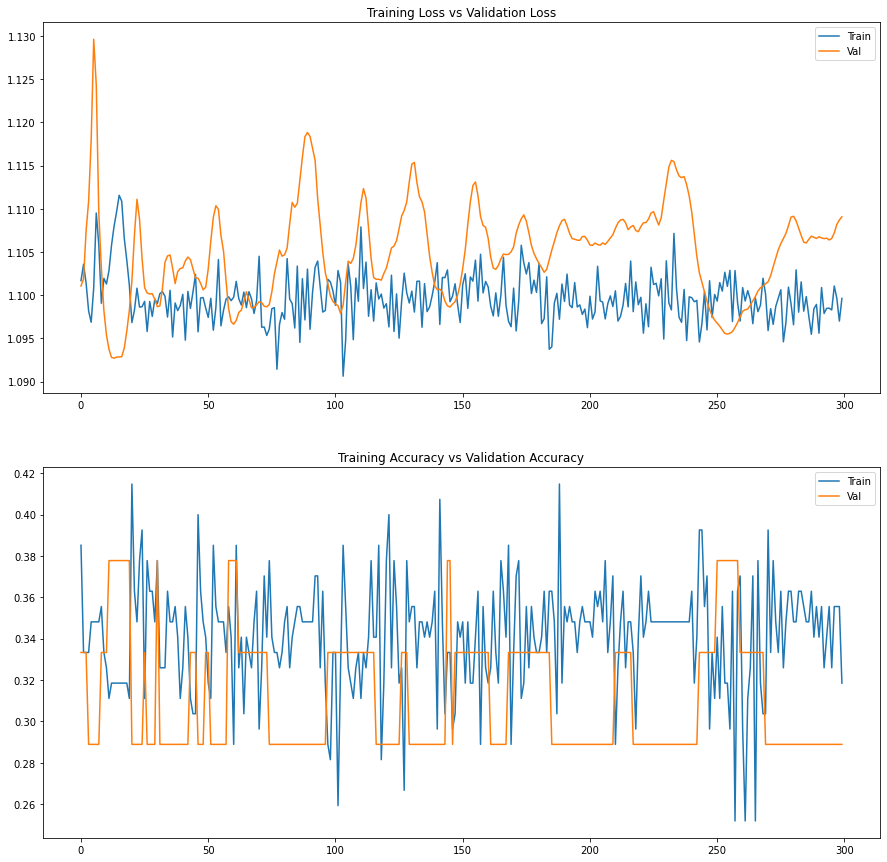

In [129]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

**evaluating the model**

In [130]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 17ms/step - loss: 1.1091 - accuracy: 0.2889


[1.1090552806854248, 0.2888889014720917]